In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# the support vector machine class :  SVM  
from sklearn.svm import SVC 

# parsing and preprocessing :
import gmparser as parse

In [2]:
data, encoded_data, X, y = parse.main()

In [3]:
data.head()

,activeInsulin,carbs,insulin,trend,glycaemia,hour,tag,postp tag
dateTime,,,,,,,,
2019-02-07 09:24:00,0.0,30.0,3.75,0.0,184.0,9,hyper,hyper
2019-02-07 12:53:00,0.0,56.0,4.95,0.0,133.0,12,normo,hyper
2019-02-07 17:39:00,0.0,12.0,1.00,0.0,99.0,17,normo,normo
2019-02-07 18:13:00,0.0,10.0,0.00,0.0,101.0,18,normo,normo
2019-02-09 10:52:00,0.0,85.0,7.80,0.0,105.0,10,normo,hyper


In [4]:
#X

In [5]:
X2 = preprocessing.scale(X)

In [6]:
#X2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state = 0) 

In [8]:
kf = KFold(n_splits=5, shuffle=False).split(y)

In [72]:
#print('Training', 7*'\t', 'Testing')
#for i, j in kf:
#    print(f'{i[0:4]}... \t{i[len(i)-5:len(i)]}, \t{j}')

In [ ]:
svm_model_linear  = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_model_rbf     = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_model_sigmoid = SVC(kernel = 'sigmoid', C = 1).fit(X_train, y_train) 
svm_predictions   = svm_model_sigmoid.predict(X_test) 

In [9]:
kernels = ['linear', 'rbf', 'sigmoid']
svc  = lambda x: SVC(kernel = x, C = 1, gamma = 'auto')
SVMs = dict(
    [(i, svc(i)) for i in kernels]
)

In [10]:
SVMs

{'linear': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'rbf': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'sigmoid': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [14]:
sigmoid_cvl = cross_val_score(SVMs['sigmoid'], X2, y, scoring='accuracy', cv = 15)

In [29]:
print(f'Cross validation scores: \nMin: {sigmoid_cvl.min()}, Mean: {round(sigmoid_cvl.mean(),3)}, Max: {sigmoid_cvl.max()}')

Cross validation scores: 
Min: 0.5, Mean: 0.661, Max: 1.0


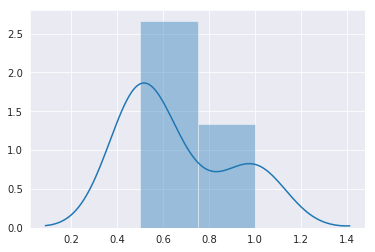

In [16]:
sb.distplot(sigmoid_cvl)

In [24]:
## model accuracy for X_test (on a train_test_split scheme)
'''
linear_accuracy = svm_model_linear.score(X_test, y_test) 
sbf_accuracy = svm_model_rbf.score(X_test, y_test) 
sigmoid_accuracy = svm_model_sigmoid.score(X_test, y_test) 


# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
'''

'\nlinear_accuracy = svm_model_linear.score(X_test, y_test) \nsbf_accuracy = svm_model_rbf.score(X_test, y_test) \nsigmoid_accuracy = svm_model_sigmoid.score(X_test, y_test) \n\n\n# creating a confusion matrix \ncm = confusion_matrix(y_test, svm_predictions) \n'

In [20]:
#linear_accuracy

In [21]:
#sbf_accuracy

In [22]:
#sigmoid_accuracy

In [19]:
#cm

In [18]:
#data

In [17]:
#scaled_data = preprocessing.scale(data)
#plot = pd.core.frame.DataFrame(index=data['postp tag'])
#for i in data:
#    plot[i] = data[i]
#plot['lol'] = list(data['activeInsulin'])